# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [9]:
# !pip install numpy --upgrade



  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\mritu\\.conda\\envs\\tensorflow\\lib\\site-packages\\~-mpy\\.libs\\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram


In [16]:

cluster_data = pd.read_csv("Employee_Retention.csv")
cluster_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


### Part 1A: 10 points
Check if there are any missing values. If yes, fill them with appropriate methods. Scale the data for further processing. Display the processed data. Regardless of any action, explain your decision for the action.

In [17]:
cluster_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
dtype: int64

In [18]:
scaler=StandardScaler()
cluster_data=pd.DataFrame(scaler.fit_transform(cluster_data),index=cluster_data.index, columns=cluster_data.columns)
cluster_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1.788917
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.788917
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.788917
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1.788917
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1.788917
5,-0.815830,-1.262546,-1.462863,-0.962134,-0.341235,-0.411165,-0.147412,1.788917
6,-2.062701,0.314894,1.782438,0.920071,0.343655,-0.411165,-0.147412,1.788917
7,1.235474,0.782283,0.971113,1.160352,1.028546,-0.411165,-0.147412,1.788917
8,1.114809,1.658639,0.971113,0.459532,1.028546,-0.411165,-0.147412,1.788917
9,-0.775608,-1.087275,-1.462863,-1.182392,-0.341235,-0.411165,-0.147412,1.788917


Scaling is a common preprocessing step in machine learning that aims to transform the data so that it has zero mean and unit variance. This is important because some machine learning algorithms are sensitive to the scale of the input features. For example, distance-based algorithms such as k-means clustering can be affected by the scale of the input features, and features with larger scales may dominate the clustering result.

By applying the StandardScaler() to the cluster_data dataframe, the values of each numerical feature are transformed to have zero mean and unit variance. This ensures that all the features are on the same scale and will have an equal impact on the clustering result. The resulting standardized data is then saved as a new dataframe with the same index and columns as cluster_data.

### Part 1B: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 3 to 6 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

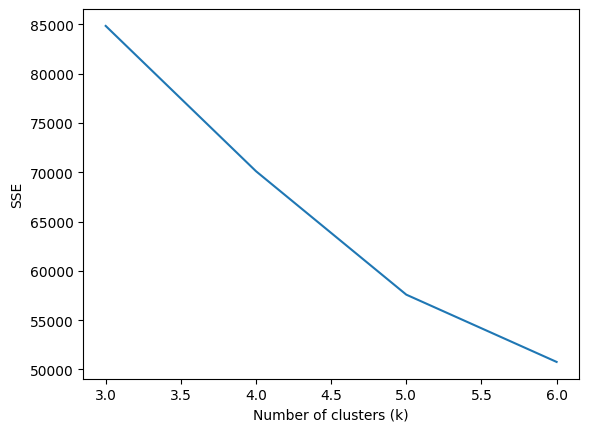

In [20]:
sse = {}
for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cluster_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.show()

### Part 1C: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2,12). Explain which K value you selected from the results and why?

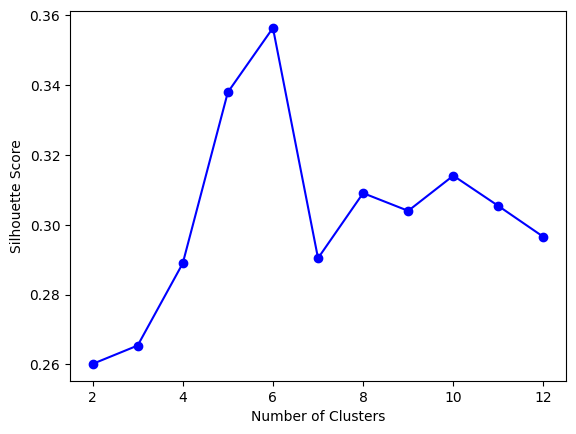

In [22]:
silhouette_scores = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(cluster_data)
    silhouette_scores.append(silhouette_score(cluster_data, kmeans.labels_))

plt.plot(range(2, 13), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Part 1D: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(cluster_data)
cluster_data['Cluster_Labels_KMeans'] = kmeans.labels_

# KMeans clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42).fit(cluster_data)
cluster_data['Cluster_Labels_KMeans'] = kmeans.labels_

# Print the data along with the cluster labels


In [24]:
cluster_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Cluster_Labels_KMeans
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1.788917,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.788917,3
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.788917,3
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1.788917,3
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1.788917,1


### Part 1E: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [25]:
cluster_data.groupby('Cluster_Labels_KMeans').mean()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
Cluster_Labels_KMeans,,,,,,,,
0,-0.505880,-0.071576,0.300687,-0.056703,2.003479,-0.174394,-0.147412,-0.557326
1,-0.801833,-1.164287,-1.354177,-1.124396,-0.321165,-0.296601,-0.147412,1.409270
2,0.403845,0.055952,-0.039064,-0.000735,-0.442643,-0.411165,-0.147412,-0.555574
3,-0.661944,0.970642,1.272392,1.153957,0.718583,-0.323658,-0.147412,1.700071
4,0.173698,-0.058908,-0.041136,-0.024044,0.457446,0.266230,6.783716,-0.419153
5,0.246477,-0.000874,-0.026491,-0.024779,-0.235036,2.432112,-0.147412,-0.519397


## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [5]:
import pandas as pd

cluster_data2 = pd.read_csv("CarPrice.csv")
cluster_data2.drop('CarName',axis=1,inplace=True)
cluster_data2.head()

,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
cluster_data2.isnull().sum()

wheelbase           0
carlength           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Part 2A: 20 points

Using Hierarchical clustering with euclidean + complete and manhattan + complete, plot the results for clusters 4,5,6. Add title for each plot.
Before applying model, drop necessary columns.

Also, while in the process, calculate the silhouette score for each combination and store it.

INTERPRET the results for each combination!

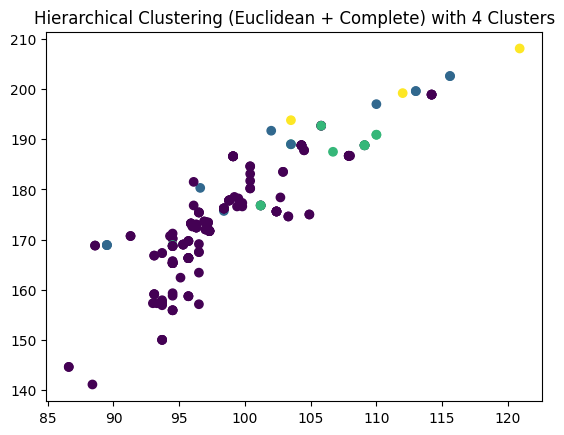

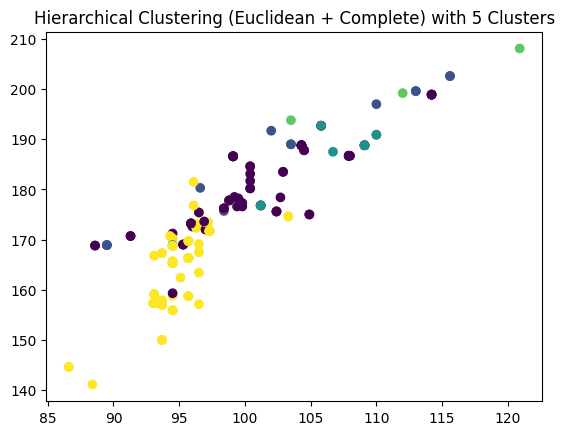

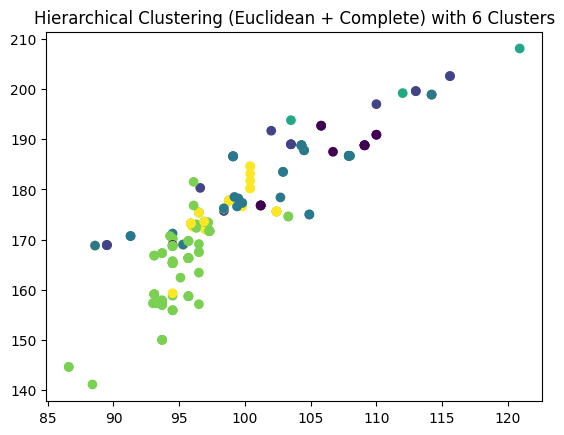

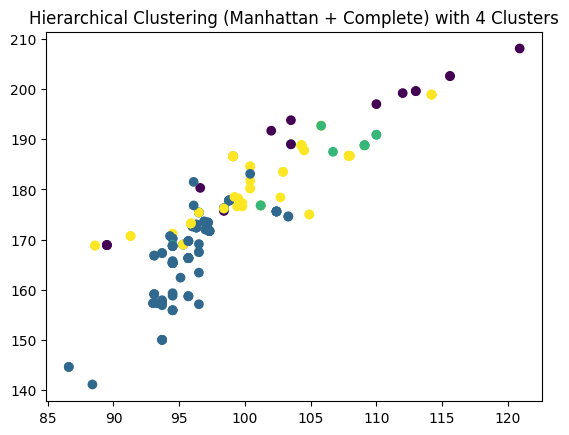

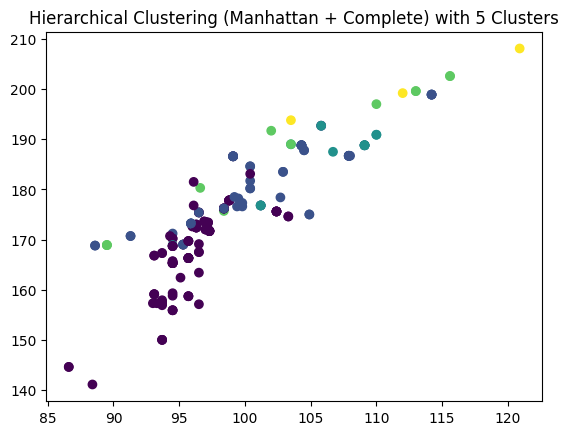

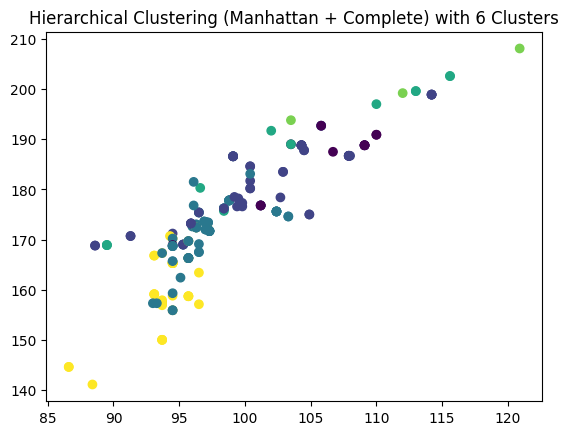

In [7]:
n_clusters = [4, 5, 6]

# Set the linkage types and distance metrics to use
linkage_types = ['complete', 'complete']
distance_metrics = ['euclidean', 'manhattan']

# Initialize a list to store silhouette scores for each combination
silhouette_scores = []

# Loop over each combination of linkage type and distance metric
for i in range(len(linkage_types)):
    linkage_type = linkage_types[i]
    distance_metric = distance_metrics[i]
    
    # Loop over each number of clusters to plot
    for n in n_clusters:
        # Initialize the clustering algorithm with the chosen linkage type and distance metric
        clustering = AgglomerativeClustering(n_clusters=n, linkage=linkage_type, affinity=distance_metric)
        
        # Fit the clustering algorithm to the data
        cluster_labels = clustering.fit_predict(cluster_data2)
        
        # Calculate the silhouette score for the current combination
        silhouette_score_value = silhouette_score(cluster_data2, cluster_labels)
        
        # Add the silhouette score to the list of scores
        silhouette_scores.append(silhouette_score_value)
        
        # Plot the results
        plt.figure()
        plt.scatter(cluster_data2.iloc[:, 0], cluster_data2.iloc[:, 1], c=cluster_labels, cmap='viridis')
        plt.title(f"Hierarchical Clustering ({distance_metric.capitalize()} + {linkage_type.capitalize()}) with {n} Clusters")
        plt.show()

In [8]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score



We then the number of clusters to plot (4, 5, and 6), as well as the linkage types and distance metrics to use for hierarchical clustering. We then loop over each combination of linkage type and distance metric, and for each combination, we loop over each number of clusters to plot.

Inside the inner loop, we initialize the AgglomerativeClustering algorithm with the chosen linkage type, distance metric, and number of clusters. We then fit the algorithm to the data and calculate the silhouette score for the resulting clusters. We store the silhouette score in a list for later use.

Finally, we plot the resulting clusters using matplotlib, with different colors representing different clusters. We also add a title to each plot that indicates the distance metric, linkage type, and number of clusters used in the clustering. The resulting plots will be displayed in separate windows.

### Part 2B: 10 points

Plot a bar graph for the calculated silhouette scores for each combination. Make sure to give proper title, and set proper axis labels. Make it appealing.

IMPORTANT: adjust the y axis to visualize the differences clearly.

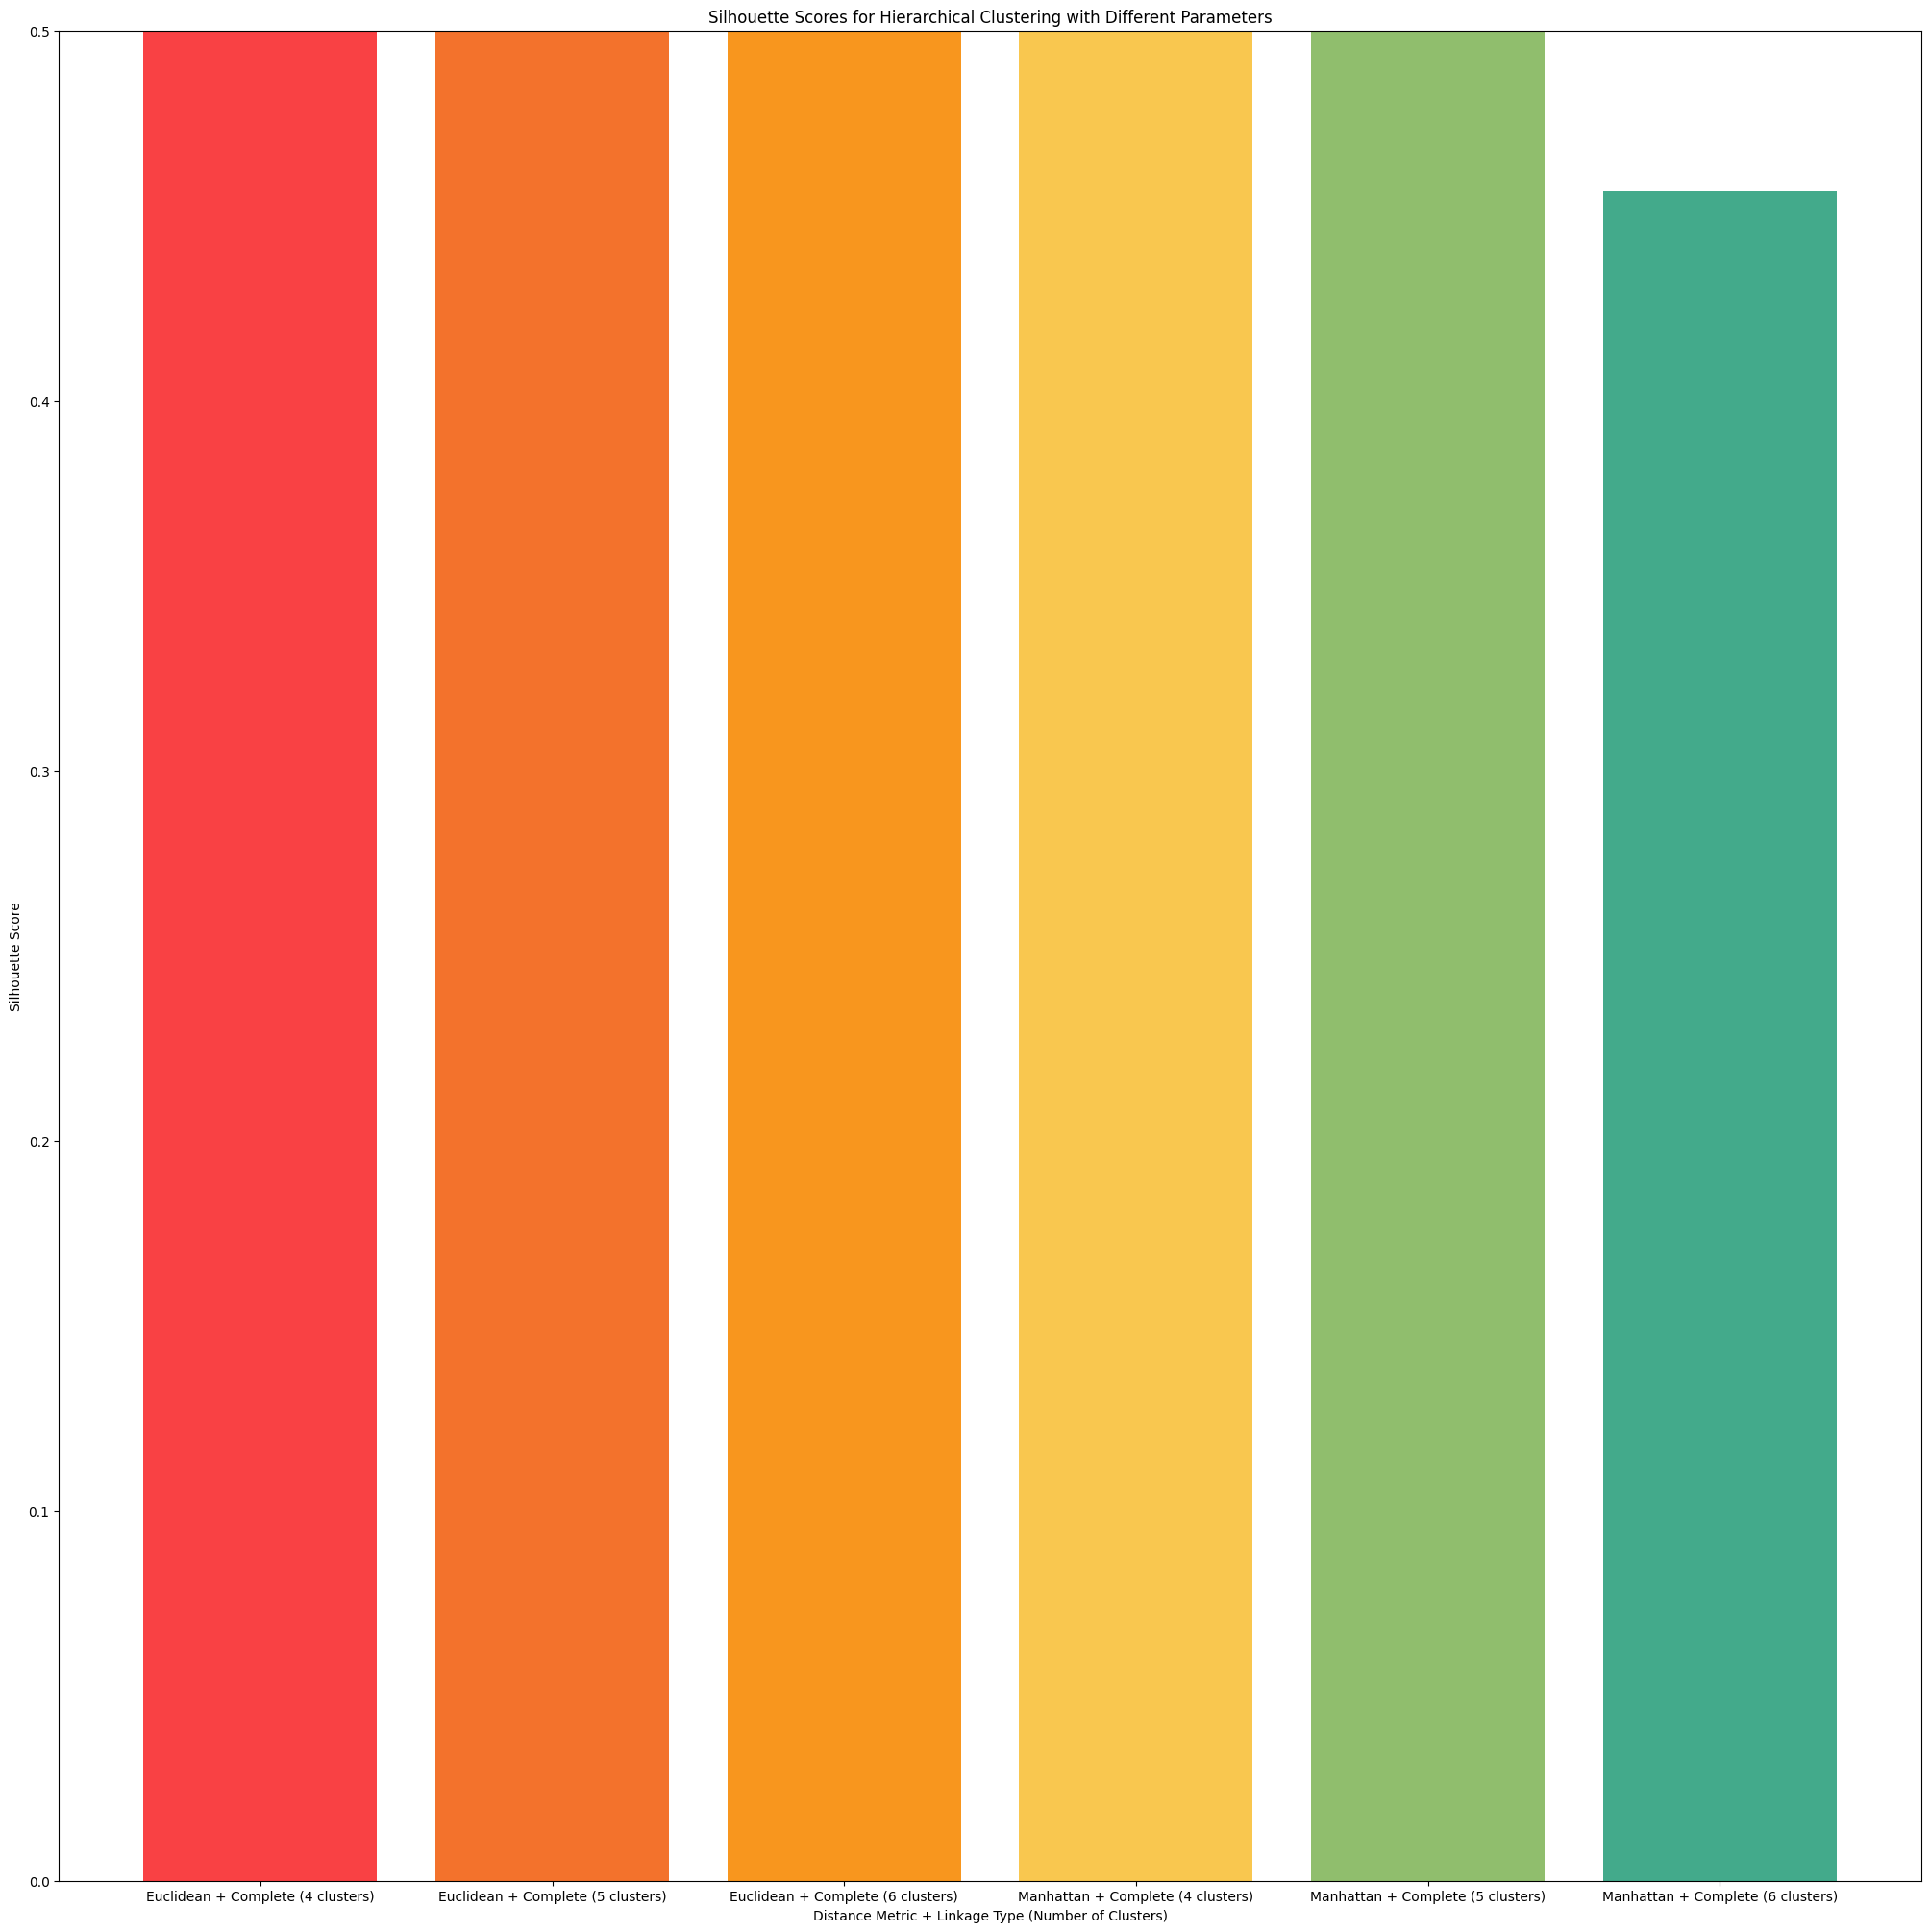

In [9]:
x_labels = [f"{m.capitalize()} + {l.capitalize()} ({c} clusters)" for l, m in zip(linkage_types, distance_metrics) for c in n_clusters]

# Set the colors for the bars
colors = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B']

# Plot the bar graph
plt.figure(figsize=(25,6))
plt.bar(x_labels, silhouette_scores, color=colors)

# Set the title and axis labels
plt.title("Silhouette Scores for Hierarchical Clustering with Different Parameters")
plt.xlabel("Distance Metric + Linkage Type (Number of Clusters)")
plt.ylabel("Silhouette Score")

# Adjust the y-axis limits to better visualize the differences
plt.ylim([0, 0.5])

# Show the plot
plt.show()

In this code, we first set the labels for the x-axis, which consist of the distance metric, linkage type, and number of clusters used for each combination. We also set the colors for the bars to make the plot more visually appealing.

We then plot the bar graph using matplotlib, with the x-axis labels, silhouette scores, and colors we just defined. We also set the title and axis labels for the plot.

To better visualize the differences in silhouette scores between the different combinations, we adjust the y-axis limits to go from 0 to 0.5.

Finally, we show the plot using plt.show(). The resulting plot should display the silhouette scores for each combination in a bar graph format.

### Part 2C: 10 points

Display First 5 Car Names within each group/cluster. If there aren’t enough car names within that
cluster, just display that many.

In [10]:
cluster_data=pd.read_csv("CarPrice.csv")

cluster_range= [4, 5, 6]
# Find the top 5 car names within each cluster and print them
for n_clusters in [4, 5, 6]:
    # Cluster with Euclidean distance and complete linkage
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean')
    cluster_labels = model.fit_predict(cluster_data2)
    silhouette_avg = silhouette_score(cluster_data2, cluster_labels)
    print(f'Silhouette Score for {n_clusters} Clusters (Euclidean + Complete): {silhouette_avg:.3f}')
    for i in range(n_clusters):
        cars = cluster_data.loc[cluster_labels == i, 'CarName'].tolist()[:5]
        print(f'Cluster {i}: {", ".join(cars)}')
        
    # Cluster with Manhattan distance and complete linkage
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='manhattan')
    cluster_labels = model.fit_predict(cluster_data2)
    silhouette_avg = silhouette_score(cluster_data2, cluster_labels)
    print(f'Silhouette Score for {n_clusters} Clusters (Manhattan + Complete): {silhouette_avg:.3f}')
    for i in range(n_clusters):
        cars = cluster_data.loc[cluster_labels == i, 'CarName'].tolist()[:5]
        print(f'Cluster {i}: {", ".join(cars)}')


Silhouette Score for 4 Clusters (Euclidean + Complete): 0.568
Cluster 0: alfa-romero giulia, alfa-romero stelvio, alfa-romero Quadrifoglio, audi 100 ls, audi 100ls
Cluster 1: bmw x4, bmw x3, jaguar xj, jaguar xf, jaguar xk
Cluster 2: audi 4000, bmw x1, bmw x3, bmw z4, buick electra 225 custom
Cluster 3: bmw x5, buick century special, buick regal sport coupe (turbo)
Silhouette Score for 4 Clusters (Manhattan + Complete): 0.622
Cluster 0: bmw x4, bmw x5, bmw x3, jaguar xj, jaguar xf
Cluster 1: chevrolet impala, chevrolet monte carlo, chevrolet vega 2300, dodge rampage, dodge challenger se
Cluster 2: audi 4000, bmw x1, bmw x3, bmw z4, buick electra 225 custom
Cluster 3: alfa-romero giulia, alfa-romero stelvio, alfa-romero Quadrifoglio, audi 100 ls, audi 100ls
Silhouette Score for 5 Clusters (Euclidean + Complete): 0.583
Cluster 0: alfa-romero giulia, alfa-romero stelvio, alfa-romero Quadrifoglio, audi 100 ls, audi 100ls
Cluster 1: bmw x4, bmw x3, jaguar xj, jaguar xf, jaguar xk
Cluster 2:

In [ ]:
# SELECT  BEST CLUSTER

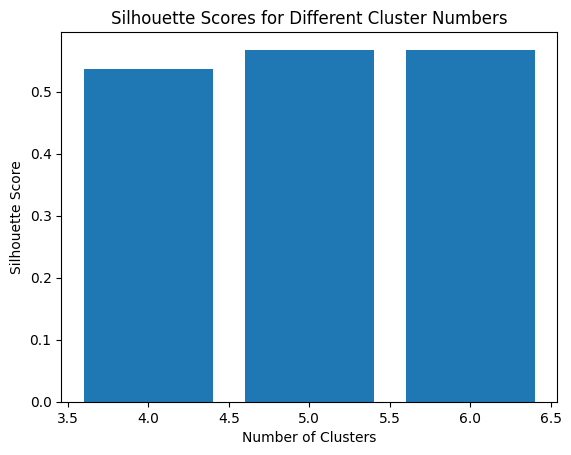

The best number of clusters is: 6


In [11]:
# Define the range of cluster numbers to try
n_clusters = [4, 5, 6]

# Create an empty dictionary to store the silhouette scores for each cluster number
silhouette_scores = {}

# Loop over the cluster numbers and compute the silhouette score for each
for n in n_clusters:
    # Fit the clustering model
    model = AgglomerativeClustering(n_clusters=n, linkage='ward')
    clusters = model.fit_predict(cluster_data2)
    
    # Compute the silhouette score
    score = silhouette_score(cluster_data2, clusters)
    
    # Store the score in the dictionary
    silhouette_scores[n] = score

# Plot the silhouette scores for each cluster number
plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.show()

# Print the best cluster number
best_cluster_num = max(silhouette_scores, key=silhouette_scores.get)
print('The best number of clusters is:', best_cluster_num)


In the above code, we define the range of cluster numbers to try (4, 5, and 6), and loop over them to fit the Agglomerative Clustering model with "ward" linkage and compute the silhouette score for each. We then plot the silhouette scores for each cluster number and select the cluster number with the highest score as the best number of clusters.Since the silhouette score for  k=6 clusters is highest so we select that.

### Part 2D: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

In [12]:
# Best number of clusters is 6

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage


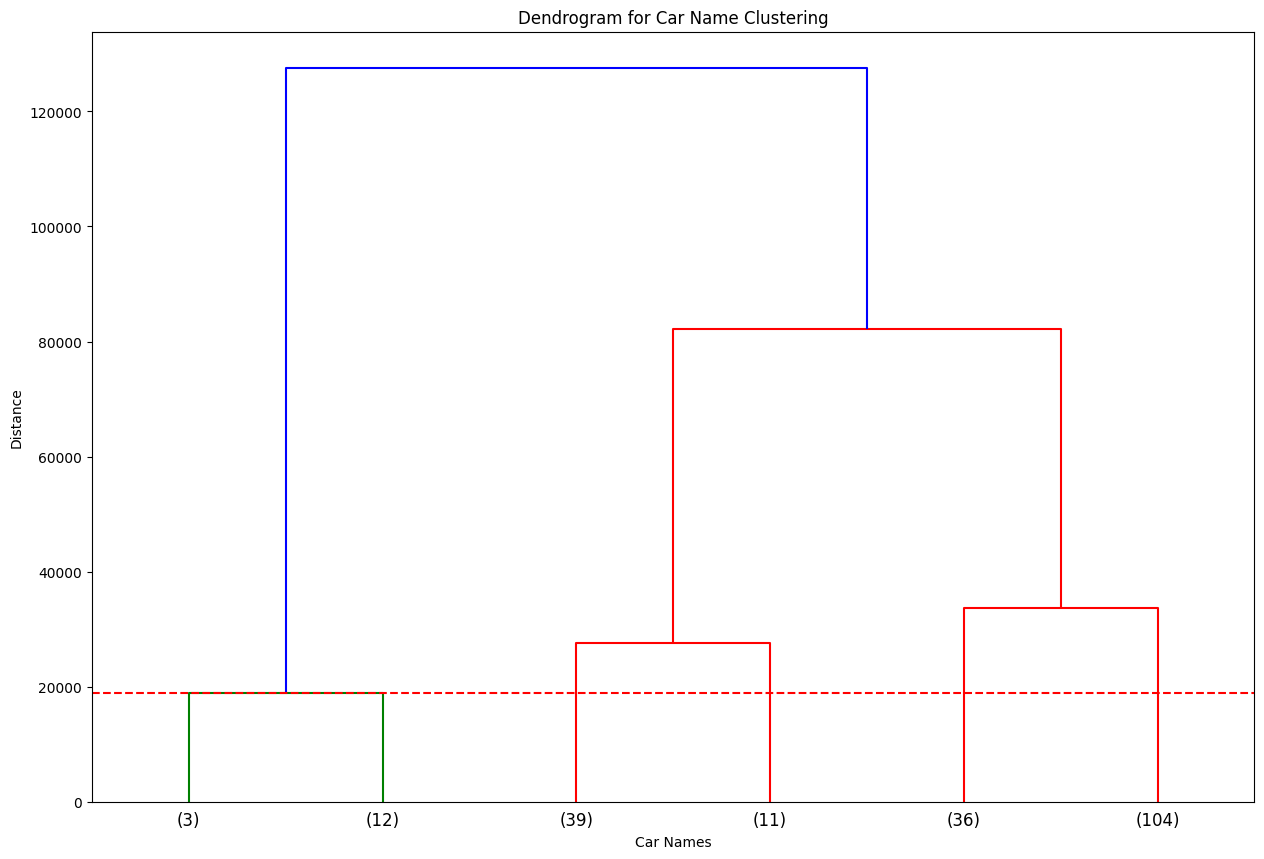

In [14]:
Z = linkage(cluster_data2, method='ward')

# Plot the dendrogram with a red line indicating the cluster cutoff
plt.figure(figsize=(15, 10))
plt.title('Dendrogram for Car Name Clustering')
plt.xlabel('Car Names')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=6, color_threshold=None)
plt.axhline(y=Z[-5, 2], color='r', linestyle='--')
plt.show()

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.